In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):

    plt.figure(figsize=(12, 8), dpi=100)
    np.set_printoptions(precision=2)

    # 在混淆矩阵中每格的概率值
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='white', fontsize=15, va='center', ha='center')
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()

In [404]:
data1=np.load('label_1.npy')
data2=np.load('label_2.npy')
data3=np.load('label_3.npy')
data4=np.load('label_4.npy')
data5=np.load('label_5.npy')
data6=np.load('label_6.npy')
U_label = list(data1[0])+list(data2[0])+list(data3[0])+list(data4[0])+list(data5[0])+list(data6[0])
I_label = list(data1[1])+list(data2[1])+list(data3[1])+list(data4[1])+list(data5[1])+list(data6[1])
H_label = list(data1[2])+list(data2[2])+list(data3[2])+list(data4[2])+list(data5[2])+list(data6[2])
T_label = list(data1[3])+list(data2[3])+list(data3[3])+list(data4[3])+list(data5[3])+list(data6[3])

[[0.5845828087444203, 0.41541719125557974], [0.1785116544883047, 0.8214883455116954]]


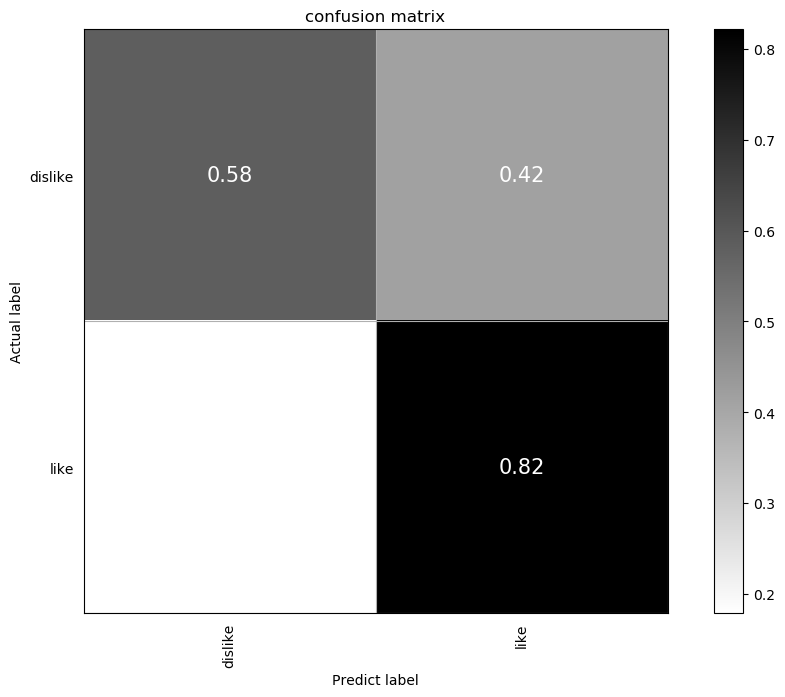

In [409]:
classes = ['dislike', 'like']

#random_numbers = np.random.randint(6, size=50)  # 6个类别，随机生成50个样本
#y_true = random_numbers.copy()  # 样本实际标签
#random_numbers[:10] = np.random.randint(6, size=10)  # 将前10个样本的值进行随机更改
#y_pred = random_numbers  # 样本预测标签

# 获取混淆矩阵
cm = confusion_matrix((np.array(T_label)>3.5), (np.array(H_label)>3.5))
cm = np.array(cm)
dm = []
for i in range(2):
    num = sum(cm[i])
    em=[]
    for j in range(2):
        em.append(cm[i][j]/num)
    dm.append(em)
print(dm)
plot_confusion_matrix(dm, 'confusion_matrix3.png', title='confusion matrix')

In [13]:
print(len(T_label))

41971


In [3]:
data_all_1 = np.load('data_all_1.npy')
data_all_2 = np.load('data_all_2.npy')
data_all_3 = np.load('data_all_3.npy')
data_all_4 = np.load('data_all_4.npy')
data_all_5 = np.load('data_all_5.npy')
data_all_6 = np.load('data_all_6.npy')

In [389]:
data_all_7 = np.load('data_all_1_1.npy')
data_all_8 = np.load('data_all_2_1.npy')
data_all_9 = np.load('data_all_3_1.npy')

In [410]:
data_all_10 = np.load('cluster_SOM1.npy')

In [420]:
data_all_11 = np.load('index_all_ubcf.npy')

In [441]:
data_all_12 = np.load('index_all_ubcf2.npy')

In [348]:
data_all_all = np.load('cluster_kmeans.npy')

In [358]:
data_all_all[1207]

array([[2.83153898, 2.83153898, 2.83153898, 2.83153898, 2.83153898,
        2.83153898, 2.83153898, 2.83153898, 2.83153898],
       [0.5       , 0.66666667, 0.5       , 0.6       , 0.66666667,
        0.71428571, 0.75      , 0.66666667, 0.7       ],
       [0.01960784, 0.03921569, 0.03921569, 0.05882353, 0.07843137,
        0.09803922, 0.11764706, 0.11764706, 0.1372549 ],
       [0.        , 0.        , 0.        , 0.        , 0.10778916,
        0.09791293, 0.09010001, 0.08372492, 0.07839827]])

In [25]:
def handdle_part_data(all_data, N):
    N_U_index_MAE=[]
    N_U_index_prec=[]
    N_U_index_recall=[]
    N_U_index_DCG=[]
    N_I_index_MAE=[]
    N_I_index_prec=[]
    N_I_index_recall=[]
    N_I_index_DCG=[]
    N_H_index_MAE=[]
    N_H_index_prec=[]
    N_H_index_recall=[]
    N_H_index_DCG=[]
    for i in range(6):
        data = all_data[i]
        N_U_index_MAE.append(sum([data[0][i][:,N-2][0] for i in range(200)])/200)
        N_U_index_prec.append(sum([data[0][i][:,N-2][1] for i in range(200)])/200)
        N_U_index_recall.append(handle([data[0][i][:,N-2][2] for i in range(200)]))
        N_U_index_DCG.append(sum([data[0][i][:,N-2][3] for i in range(200)])/200)

        N_I_index_MAE.append(sum([data[1][i][:,N-2][0] for i in range(200)])/200)
        N_I_index_prec.append(sum([data[1][i][:,N-2][1] for i in range(200)])/200)
        N_I_index_recall.append(handle([data[1][i][:,N-2][2] for i in range(200)]))
        N_I_index_DCG.append(sum([data[1][i][:,N-2][3] for i in range(200)])/200)

        N_H_index_MAE.append(sum([data[2][i][:,N-2][0] for i in range(200)])/200)
        N_H_index_prec.append(sum([data[2][i][:,N-2][1] for i in range(200)])/200)
        N_H_index_recall.append(handle([data[2][i][:,N-2][2] for i in range(200)]))
        N_H_index_DCG.append(sum([data[2][i][:,N-2][3] for i in range(200)])/200)
    a1 = sum(N_U_index_MAE)/6
    b1 = sum(N_U_index_prec)/6
    c1 = sum(N_U_index_recall)/6
    d1 = sum(N_U_index_DCG)/6
    a2 = sum(N_I_index_MAE)/6
    b2 = sum(N_I_index_prec)/6
    c2 = sum(N_I_index_recall)/6
    d2 = sum(N_I_index_DCG)/6
    a3 = sum(N_H_index_MAE)/6
    b3 = sum(N_H_index_prec)/6
    c3 = sum(N_H_index_recall)/6
    d3 = sum(N_H_index_DCG)/6
    return [[a1,b1,c1,d1],[a2,b2,c2,d2],[a3,b3,c3,d3]]

In [394]:
def handdle_part_data3(all_data, N):
    N_U_index_MAE=[]
    N_U_index_prec=[]
    N_U_index_recall=[]
    N_U_index_DCG=[]
    for i in range(3):
        data = all_data[i]
        N_U_index_MAE.append(sum([data[i][:,N-2][0] for i in range(400)])/400)
        N_U_index_prec.append(sum([data[i][:,N-2][1] for i in range(400)])/400)
        N_U_index_recall.append(handle([data[i][:,N-2][2] for i in range(400)]))
        N_U_index_DCG.append(sum([data[i][:,N-2][3] for i in range(400)])/400)
    a1 = sum(N_U_index_MAE)/3
    b1 = sum(N_U_index_prec)/3
    c1 = sum(N_U_index_recall)/3
    d1 = sum(N_U_index_DCG)/3
    return [[a1,b1,c1,d1]]

In [379]:
data_all_all[1207][:,0][3]

0.0

In [454]:
def handdle_part_data2(all_data, N):
    num = 76
    N_U_index_MAE=[]
    N_U_index_prec=[]
    N_U_index_recall=[]
    N_U_index_DCG=[]
    data = all_data
    N_U_index_MAE.append(sum([data[i][:,N-2][0] for i in range(num)])/num)
    N_U_index_prec.append(sum([data[i][:,N-2][1] for i in range(num)])/num)
    N_U_index_recall.append(handle([data[i][:,N-2][2] for i in range(num)]))
    N_U_index_DCG.append(sum([data[i][:,N-2][3] for i in range(num)])/num)
    a1 = sum(N_U_index_MAE)
    b1 = sum(N_U_index_prec)
    c1 = sum(N_U_index_recall)
    d1 = sum(N_U_index_DCG)
    return [a1,b1,c1,d1]

In [381]:
handdle_part_data2(data_all_all, 10)

[2.765509752541219, 0.6975211552612202, 0.5820857702612061, 0.7592687297686441]

In [413]:
handdle_part_data2(data_all_10, 10)

[1.93336873466319, 0.6865112214863868, 0.5773748430790205, 0.7383081669493622]

In [423]:
handdle_part_data2(data_all_11, 10)

[2.142232957986281, 0.6139880952380953, 0.996774193548387, 0.998165899515152]

In [479]:
handdle_part_data2(data_all_12, 10)

[2.408784863531637, 0.6771825396825396, 0.99227078891258, 0.9972177579214698]

In [476]:
data_all_12[60]

array([[2.46, 2.46, 2.46, 2.46, 2.46, 2.46, 2.46, 2.46, 2.46],
       [0.5 , 0.67, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
       [0.33, 0.67, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.39, 0.53, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

In [34]:
def handle(data):
    data2=[]
    for i in data:
        if np.isnan(i):
            continue
        data2.append(i)
    data3 = sum(data2)/len(data2)
    return data3

In [390]:
all_data_all_all = [data_all_7,data_all_8,data_all_9]

In [28]:
all_data = [data_all_1,data_all_2,data_all_3,data_all_4,data_all_5,data_all_6]
handdle_part_data(all_data, 10)

[[1.3684655538722346,
  0.719525462962963,
  0.5955237935182276,
  0.7606709953956307],
 [0.7840446260049202,
  0.7180254629629631,
  0.5980880322728281,
  0.7716469988164802],
 [0.8468699995307986,
  0.7640254629629634,
  0.6191973577077129,
  0.8346142579242587]]

In [395]:
handdle_part_data3(all_data_all_all, 2)

[[1.7138844909189064,
  0.6687500000000001,
  0.16379310105779277,
  0.38116200044751164]]

In [46]:
U_DCG= [handdle_part_data(all_data, N)[0][3] for N in range(2,11)]
I_DCG= [handdle_part_data(all_data, N)[1][3] for N in range(2,11)]
H_DCG= [handdle_part_data(all_data, N)[2][3] for N in range(2,11)]

In [384]:
CK_DCG = [handdle_part_data2(data_all_all, N)[3] for N in range(2,11)]

In [396]:
II_DCG = [handdle_part_data3(all_data_all_all, N)[0][3] for N in range(2,11)]

In [411]:
SO_DCG = [handdle_part_data2(data_all_10, N)[3] for N in range(2,11)]

In [461]:
UU_DCG = [handdle_part_data2(data_all_12, N)[3] for N in range(2,11)]

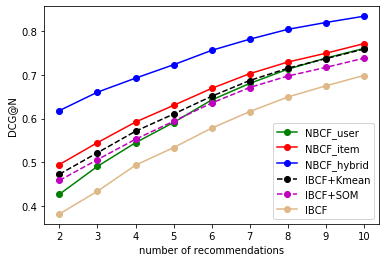

In [477]:
plt.plot([2,3,4,5,6,7,8,9,10],U_DCG,'go-')
plt.plot([2,3,4,5,6,7,8,9,10],I_DCG,'ro-')
plt.plot([2,3,4,5,6,7,8,9,10],H_DCG,'bo-')
plt.plot([2,3,4,5,6,7,8,9,10],CK_DCG,'ko--')
plt.plot([2,3,4,5,6,7,8,9,10],SO_DCG,'mo--')
plt.plot([2,3,4,5,6,7,8,9,10],II_DCG,'burlywood',linestyle='-',marker='o')
#plt.plot([2,3,4,5,6,7,8,9,10],UU_DCG,'burlywood',linestyle='-',marker='o')
plt.xlabel('number of recommendations')
plt.ylabel('DCG@N')
plt.legend(['NBCF_user','NBCF_item','NBCF_hybrid','IBCF+Kmean','IBCF+SOM','IBCF'])
plt.savefig("DCG5.png")
plt.show()

In [50]:
U_recall= [handdle_part_data(all_data, N)[0][2] for N in range(2,11)]
I_recall= [handdle_part_data(all_data, N)[1][2] for N in range(2,11)]
H_recall= [handdle_part_data(all_data, N)[2][2] for N in range(2,11)]
U_prec= [handdle_part_data(all_data, N)[0][1] for N in range(2,11)]
I_prec= [handdle_part_data(all_data, N)[1][1] for N in range(2,11)]
H_prec= [handdle_part_data(all_data, N)[2][1] for N in range(2,11)]

In [387]:
CK_prec = [handdle_part_data2(data_all_all, N)[1] for N in range(2,11)]
CK_recall = [handdle_part_data2(data_all_all, N)[2] for N in range(2,11)]

In [399]:
II_prec = [handdle_part_data3(all_data_all_all, N)[0][1] for N in range(2,11)]
II_recall = [handdle_part_data3(all_data_all_all, N)[0][2] for N in range(2,11)]

In [414]:
SO_prec = [handdle_part_data2(data_all_10, N)[1] for N in range(2,11)]
SO_recall = [handdle_part_data2(data_all_10, N)[2] for N in range(2,11)]

In [463]:
UU_prec = [handdle_part_data2(data_all_12, N)[1] for N in range(2,11)]
UU_recall = [handdle_part_data2(data_all_12, N)[2] for N in range(2,11)]

In [418]:
np.save('Item',[II_prec, II_recall, II_DCG])

In [417]:
np.save('SOM',[SO_prec, SO_recall, SO_DCG])
np.save('CK', [CK_prec, CK_recall, CK_DCG])

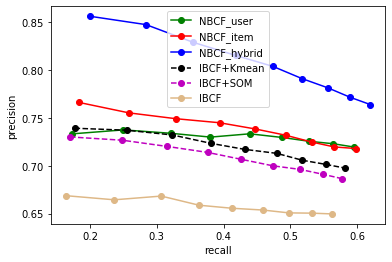

In [478]:
plt.plot(U_recall,U_prec,'go-')
plt.plot(I_recall,I_prec,'ro-')
plt.plot(H_recall,H_prec,'bo-')
plt.plot(CK_recall,CK_prec,'ko--')
plt.plot(SO_recall,SO_prec,'mo--')
plt.plot(II_recall,II_prec,'burlywood',linestyle='-',marker='o')
#plt.plot(UU_recall,UU_prec,'burlywood',linestyle='-',marker='o')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['NBCF_user','NBCF_item','NBCF_hybrid','IBCF+Kmean','IBCF+SOM','IBCF'])
plt.savefig("precision_recall_4.png")
plt.show()

In [116]:
data_all_1 = np.load('label_all_1.npy', allow_pickle=True)
data_all_2 = np.load('label_all_2.npy', allow_pickle=True)
data_all_3 = np.load('label_all_3.npy', allow_pickle=True)
data_all_4 = np.load('label_all_4.npy', allow_pickle=True)
data_all_5 = np.load('label_all_5.npy', allow_pickle=True)
data_all_6 = np.load('label_all_6.npy', allow_pickle=True)

In [117]:
true_label = np.array(list(data_all_1[3])+list(data_all_2[3])+list(data_all_3[3])+list(data_all_4[3])+list(data_all_5[3])+list(data_all_6[3]),dtype=int)

In [187]:
len(data_all_1[3])

2136

In [124]:
U_label_all = np.array([i[0] for i in data_all_1[0]]+[i[0] for i in data_all_2[0]]+[i[0] for i in data_all_3[0]]+[i[0] for i in data_all_4[0]]+[i[0] for i in data_all_5[0]]+[i[0] for i in data_all_6[0]])
I_label_all = np.array([i[0] for i in data_all_1[1]]+[i[0] for i in data_all_2[1]]+[i[0] for i in data_all_3[1]]+[i[0] for i in data_all_4[1]]+[i[0] for i in data_all_5[1]]+[i[0] for i in data_all_6[1]])
H_label_all = np.array([i[0] for i in data_all_1[2]]+[i[0] for i in data_all_2[2]]+[i[0] for i in data_all_3[2]]+[i[0] for i in data_all_4[2]]+[i[0] for i in data_all_5[2]]+[i[0] for i in data_all_6[2]])
U_posi_all = np.array([i[1] for i in data_all_1[0]]+[i[1] for i in data_all_2[0]]+[i[1] for i in data_all_3[0]]+[i[1] for i in data_all_4[0]]+[i[1] for i in data_all_5[0]]+[i[1] for i in data_all_6[0]])
I_posi_all = np.array([i[1] for i in data_all_1[1]]+[i[1] for i in data_all_2[1]]+[i[1] for i in data_all_3[1]]+[i[1] for i in data_all_4[1]]+[i[1] for i in data_all_5[1]]+[i[1] for i in data_all_6[1]])
H_posi_all = np.array([i[1] for i in data_all_1[2]]+[i[1] for i in data_all_2[2]]+[i[1] for i in data_all_3[2]]+[i[1] for i in data_all_4[2]]+[i[1] for i in data_all_5[2]]+[i[1] for i in data_all_6[2]])

In [198]:
np.where(U_posi_all>0.5)

(array([    0,     1,     2, ..., 19574, 19575, 19576], dtype=int64),)

In [275]:
from sklearn import metrics
def cal_acc(U,P,pos1,pos2):
    return metrics.accuracy_score(U[np.where(np.logical_and(P>pos1, P<=pos2))],true_label[np.where(np.logical_and(P>pos1, P<=pos2))]), len(np.where(np.logical_and(P>pos1, P<=pos2))[0])

In [340]:
acc_reli = [cal_acc(U_label_all, U_posi_all, 0.2+0.1*i, 0.3+0.1*i) for i in range(2,8)]

In [341]:
acc_reli1 = [cal_acc(I_label_all, I_posi_all, 0.2+0.1*i, 0.3+0.1*i) for i in range(2, 8)]

In [342]:
acc_reli3 = [cal_acc(H_label_all, H_posi_all, 0.2+0.1*i, 0.3+0.1*i) for i in range(2, 8)]

In [336]:
acc_reli3

[(0.6057829945605496, 3493),
 (0.7399577167019028, 473),
 (0.8024691358024691, 81),
 (0.9545454545454546, 22),
 (1.0, 6),
 (1.0, 1)]

In [338]:
acc_reli3

[(0.3192771084337349, 2324),
 (0.4520755862487668, 13177),
 (0.6057829945605496, 3493),
 (0.7399577167019028, 473),
 (0.8024691358024691, 81),
 (0.9545454545454546, 22),
 (1.0, 6),
 (1.0, 1)]

In [269]:
acc_reli = cal_acc(U_label_all, U_posi_all, 1, 1)
cities = ['0.20-0.25','0.25-0.30', '0.30-0.35', '0.35-0.40','0.40-0.45','0.45-0.50','0.50-0.55','0.55-0.60','0.60-0.65','0.65-0.70','0.70-0.75','0.75-0.80','0.80-0.85','0.85-0.90','0.90-0.95','0.95-1.00']

In [343]:
acc_reli = np.array(acc_reli)
acc_reli[0][0] = 0.0263158
acc_reli1 = np.array(acc_reli1)
acc_reli3 = np.array(acc_reli3)
acc_reli1[0][0] = 0.1589404
acc_reli3[0][0] = 0.464094

TypeError: list indices must be integers or slices, not tuple

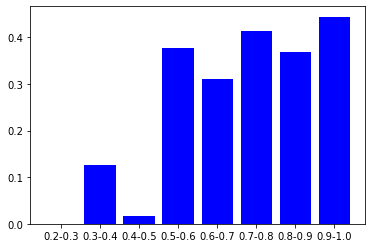

In [306]:
import matplotlib.pyplot as plt
cities = ['0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0']
gdps = [35371.3, 38155.32, 14104.28, 23605.77]
plt.bar(cities, acc_reli[:,0], color='b', label='NBCF_user')
plt.bar(cities, acc_reli1[:,0], color='r', label='NBCF_item')
plt.xlabel('reliability', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()
plt.savefig("bar_U.png")
plt.show()

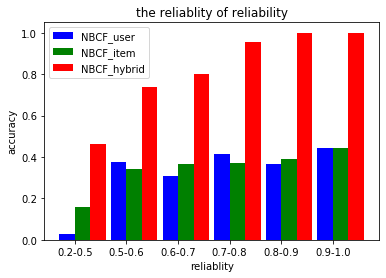

In [347]:
waters = ['0.2-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0']
buy_number_male = acc_reli[:,0]
buy_number_female = acc_reli1[:,0]
buy_number_female1 = acc_reli3[:,0]
bar_width = 0.3 # 条形宽度
index_male = np.arange(len(waters)) # 男生条形图的横坐标
index_female = index_male + bar_width # 女生条形图的横坐标
index_female1 = index_male + 2*bar_width # 女生条形图的横坐标
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=buy_number_male, width=bar_width, color='b', label='NBCF_user')
plt.bar(index_female, height=buy_number_female, width=bar_width, color='g', label='NBCF_item')
plt.bar(index_female1, height=buy_number_female1, width=bar_width, color='r', label='NBCF_hybrid')
plt.legend() # 显示图例
plt.xticks(index_male + bar_width/2, waters) # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('accuracy') # 纵坐标轴标题
plt.xlabel('reliablity') # 纵坐标轴标题
plt.title('the reliablity of reliability') # 图形标题
plt.savefig("bar.png")
plt.show()

In [ ]:
plt.bar(index_male, height=buy_number_male, width=bar_width, color='b', label='男性')
plt.bar(index_female, height=buy_number_female, width=bar_width, color='g', label='女性')